In [5]:
import chess
import chess.pgn
import matplotlib.pyplot as plt
import time

In [10]:
# Testing opening of the pgn file and reading data

file_path = "/Volumes/Crucial/Chess estimator/lichess_db_standard_rated_2024-09.pgn"

with open(file_path, "r") as pgn_file:
    for i in range(10):
        game = chess.pgn.read_game(pgn_file)
        
        white_player = game.headers["White"]
        black_player = game.headers["Black"]
        result = game.headers["Result"]
        print(f"Game {i}: {white_player} vs {black_player} - Result: {result}")
        print(game.headers)
        

Game 0: julea vs slothing - Result: 0-1
Headers(Event='Rated Blitz game', Site='https://lichess.org/Nv1Ghy7F', Date='2024.09.01', Round='-', White='julea', Black='slothing', Result='0-1', UTCDate='2024.09.01', UTCTime='00:00:04', WhiteElo='1968', BlackElo='1975', WhiteRatingDiff='-5', BlackRatingDiff='+6', ECO='A57', Opening='Benko Gambit', TimeControl='180+0', Termination='Normal')
Game 1: zelikopus vs siamawesome - Result: 0-1
Headers(Event='Rated Blitz game', Site='https://lichess.org/PmyD7ZgW', Date='2024.09.01', Round='-', White='zelikopus', Black='siamawesome', Result='0-1', UTCDate='2024.09.01', UTCTime='00:00:04', WhiteElo='1059', BlackElo='1062', WhiteRatingDiff='-6', BlackRatingDiff='+5', ECO='A01', Opening='Nimzo-Larsen Attack: Classical Variation', TimeControl='180+0', Termination='Time forfeit')
Game 2: kevuk vs Kcd - Result: 1/2-1/2
Headers(Event='Rated Blitz game', Site='https://lichess.org/HCdPRkPt', Date='2024.09.01', Round='-', White='kevuk', Black='Kcd', Result='1/2-

The goal is to create histograms of different parameters of the games to see the distribution of the data.

Target parameters:
- Player ratings (each game will increment 2 bins with the ratings of the players)
- Game result (win, loss, draw)
- Game length (number of moves)
- Time control

In [10]:
# Create histograms based on different parameters

NUMBER_OF_GAMES = 2500000

# Game ratings
RATING_BIN_SIZE = 25

rating_range = (600, 3400)

rating_bins = [0] * ((rating_range[1] - rating_range[0]) // RATING_BIN_SIZE + 1)

# Game results for white player
result_bins = [0, 0, 0] # win, loss, draw

# Game length
LENGTH_BIN_SIZE = 5

length_range = (0, 300)

length_bins = [0] * ((length_range[1] - length_range[0]) // LENGTH_BIN_SIZE + 1)

# Time control
time_control_bins = {} 

time_start = time.time()

with open(file_path, "r") as pgn_file:
    for i in range(NUMBER_OF_GAMES):
        if i % 10000 == 0:
            print(f"Processed {i} games")
        game = chess.pgn.read_game(pgn_file)
        
        white_player = game.headers["White"]
        black_player = game.headers["Black"]
        result = game.headers["Result"]
        game_length = game.end().board().fullmove_number
        time_control = game.headers["TimeControl"]
        
        white_rating = int(game.headers["WhiteElo"])
        black_rating = int(game.headers["BlackElo"])
        
        rating_bins[(white_rating - rating_range[0]) // RATING_BIN_SIZE] += 1
        rating_bins[(black_rating - rating_range[0]) // RATING_BIN_SIZE] += 1
        
        if result == "1-0":
            result_bins[0] += 1
        elif result == "0-1":
            result_bins[1] += 1
        else:
            result_bins[2] += 1
        
        length_bins[game_length // LENGTH_BIN_SIZE] += 1
        
        if time_control in time_control_bins:
            time_control_bins[time_control] += 1
        else:
            time_control_bins[time_control] = 1
            
print(f"Processing took {time.time() - time_start} seconds")

Processed 0 games
Processed 10000 games
Processed 20000 games
Processed 30000 games
Processed 40000 games
Processed 50000 games
Processed 60000 games
Processed 70000 games
Processed 80000 games
Processed 90000 games
Processed 100000 games
Processed 110000 games
Processed 120000 games
Processed 130000 games
Processed 140000 games
Processed 150000 games
Processed 160000 games
Processed 170000 games
Processed 180000 games
Processed 190000 games
Processed 200000 games
Processed 210000 games
Processed 220000 games
Processed 230000 games
Processed 240000 games
Processed 250000 games
Processed 260000 games
Processed 270000 games
Processed 280000 games
Processed 290000 games
Processed 300000 games
Processed 310000 games
Processed 320000 games
Processed 330000 games
Processed 340000 games
Processed 350000 games
Processed 360000 games
Processed 370000 games
Processed 380000 games
Processed 390000 games
Processed 400000 games
Processed 410000 games
Processed 420000 games
Processed 430000 games
Pr

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '60+0'),
  Text(1, 0, '180+0'),
  Text(2, 0, '300+0'),
  Text(3, 0, '600+0'),
  Text(4, 0, '180+2'),
  Text(5, 0, '120+1'),
  Text(6, 0, '300+3'),
  Text(7, 0, '600+5'),
  Text(8, 0, '15+0'),
  Text(9, 0, '30+0'),
  Text(10, 0, '900+10'),
  Text(11, 0, '1800+0'),
  Text(12, 0, '60+1'),
  Text(13, 0, '120+0'),
  Text(14, 0, '900+0'),
  Text(15, 0, '600+3'),
  Text(16, 0, '300+5'),
  Text(17, 0, '600+2'),
  Text(18, 0, '300+2'),
  Text(19, 0, '-')])

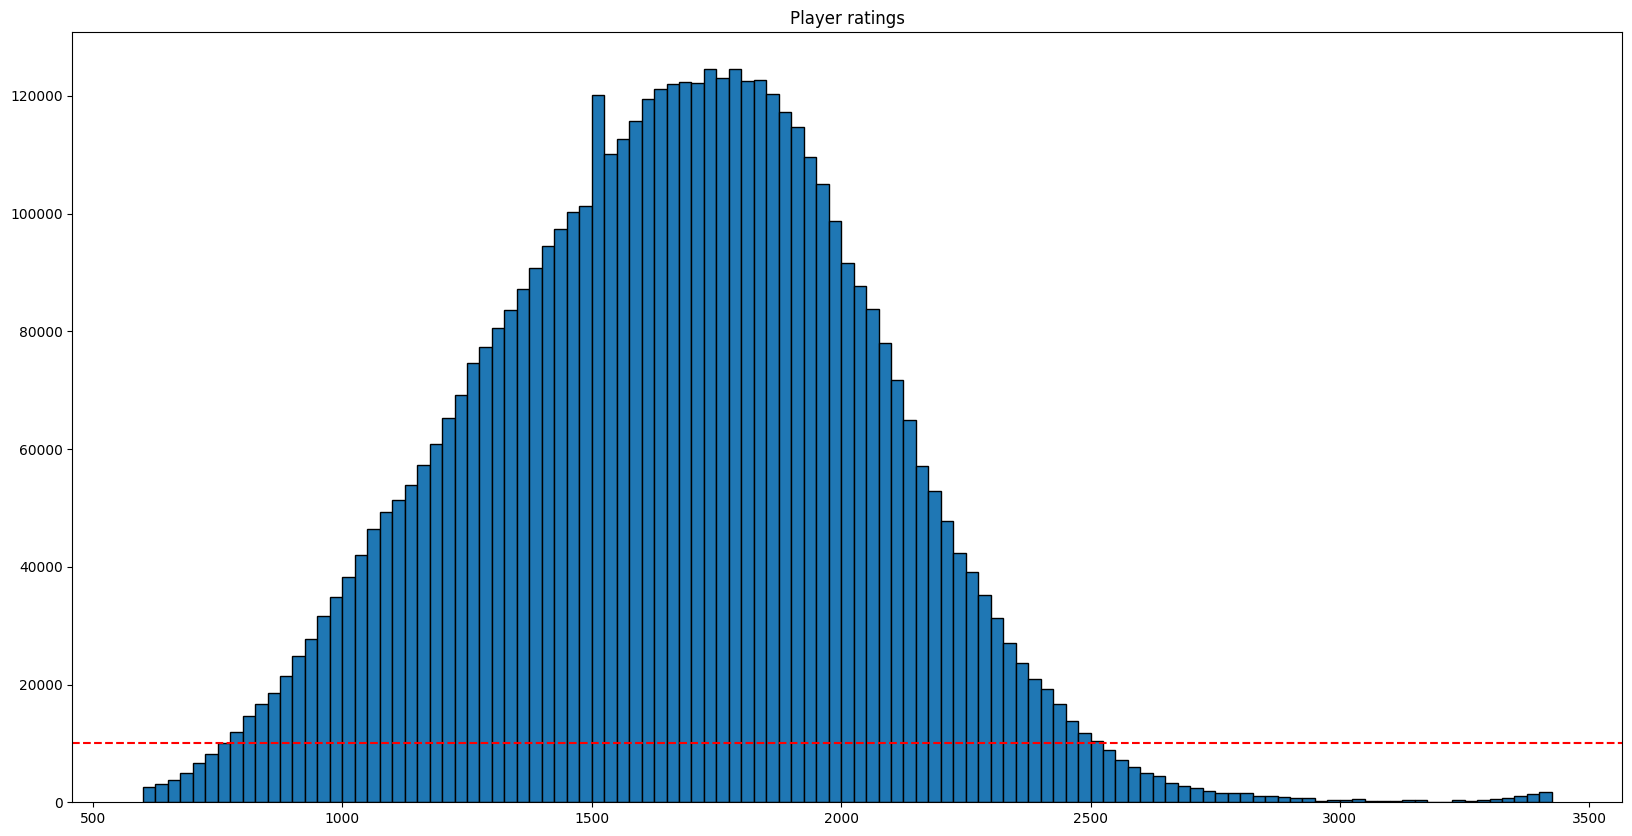

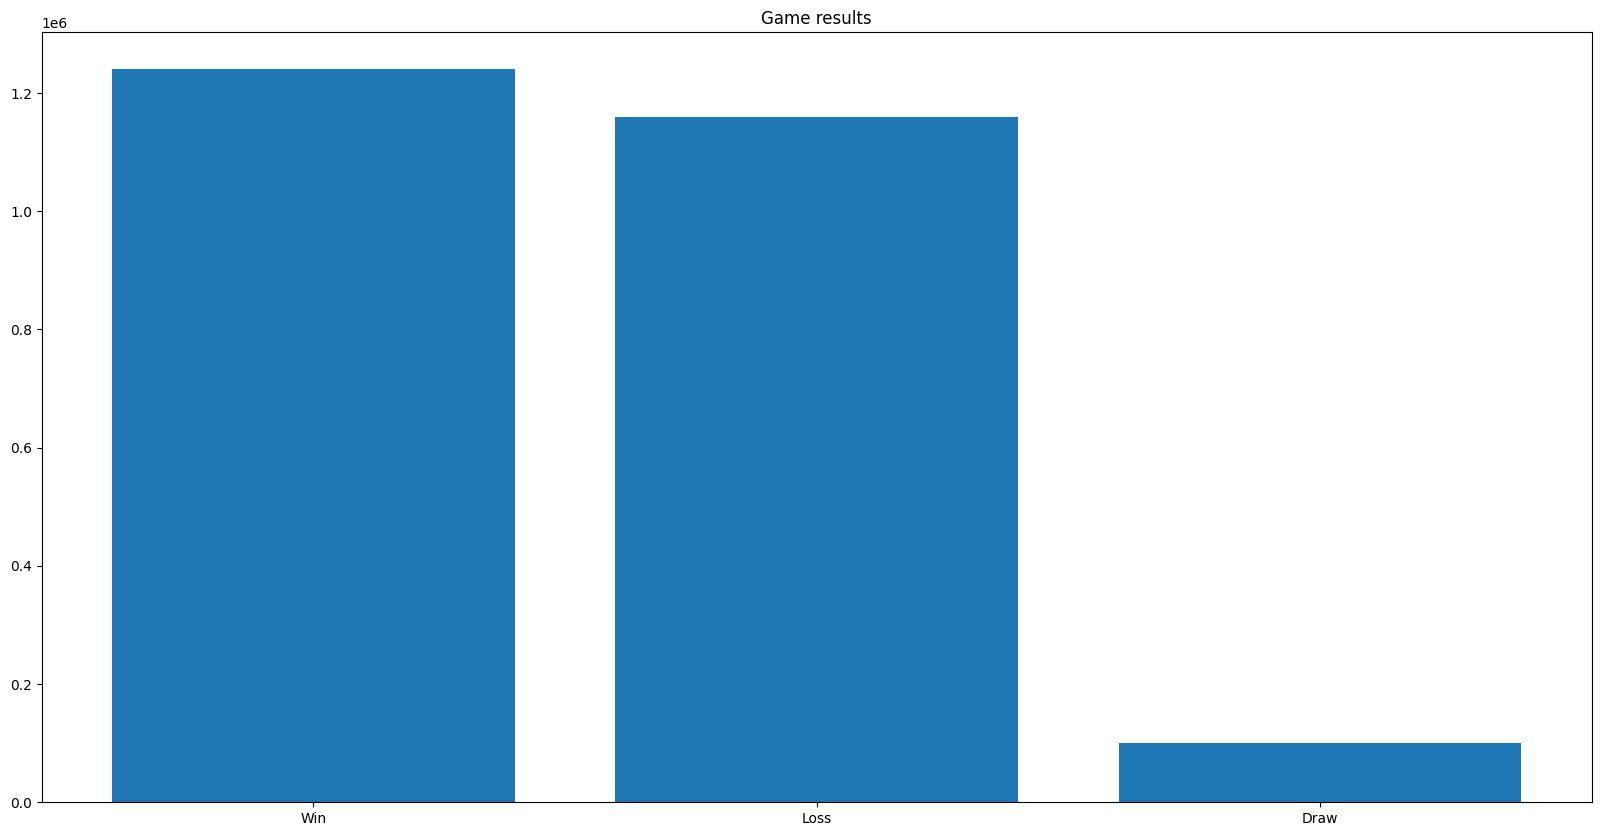

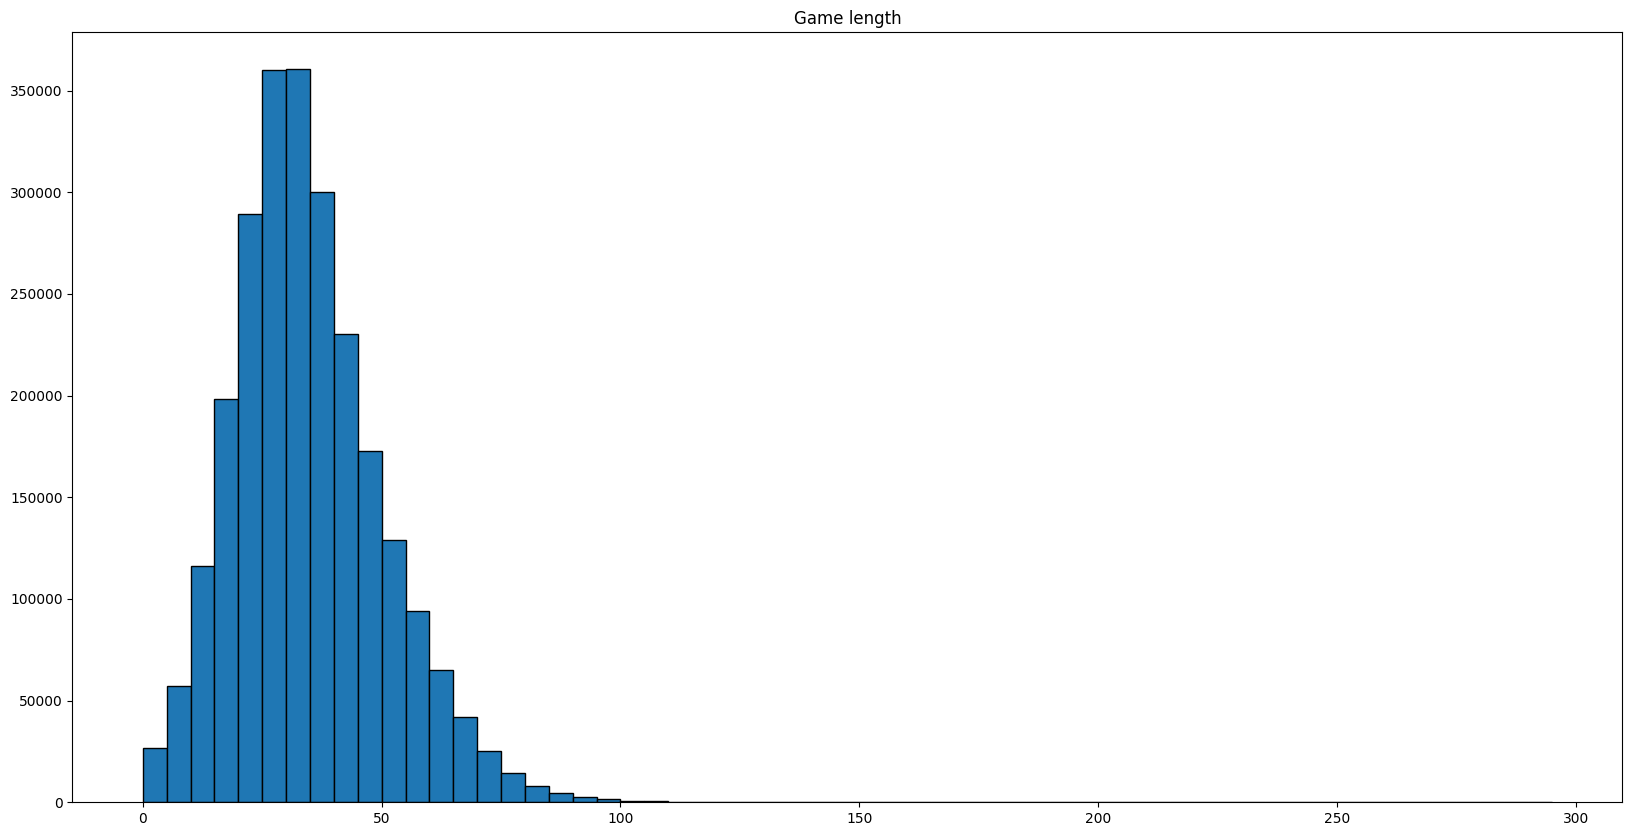

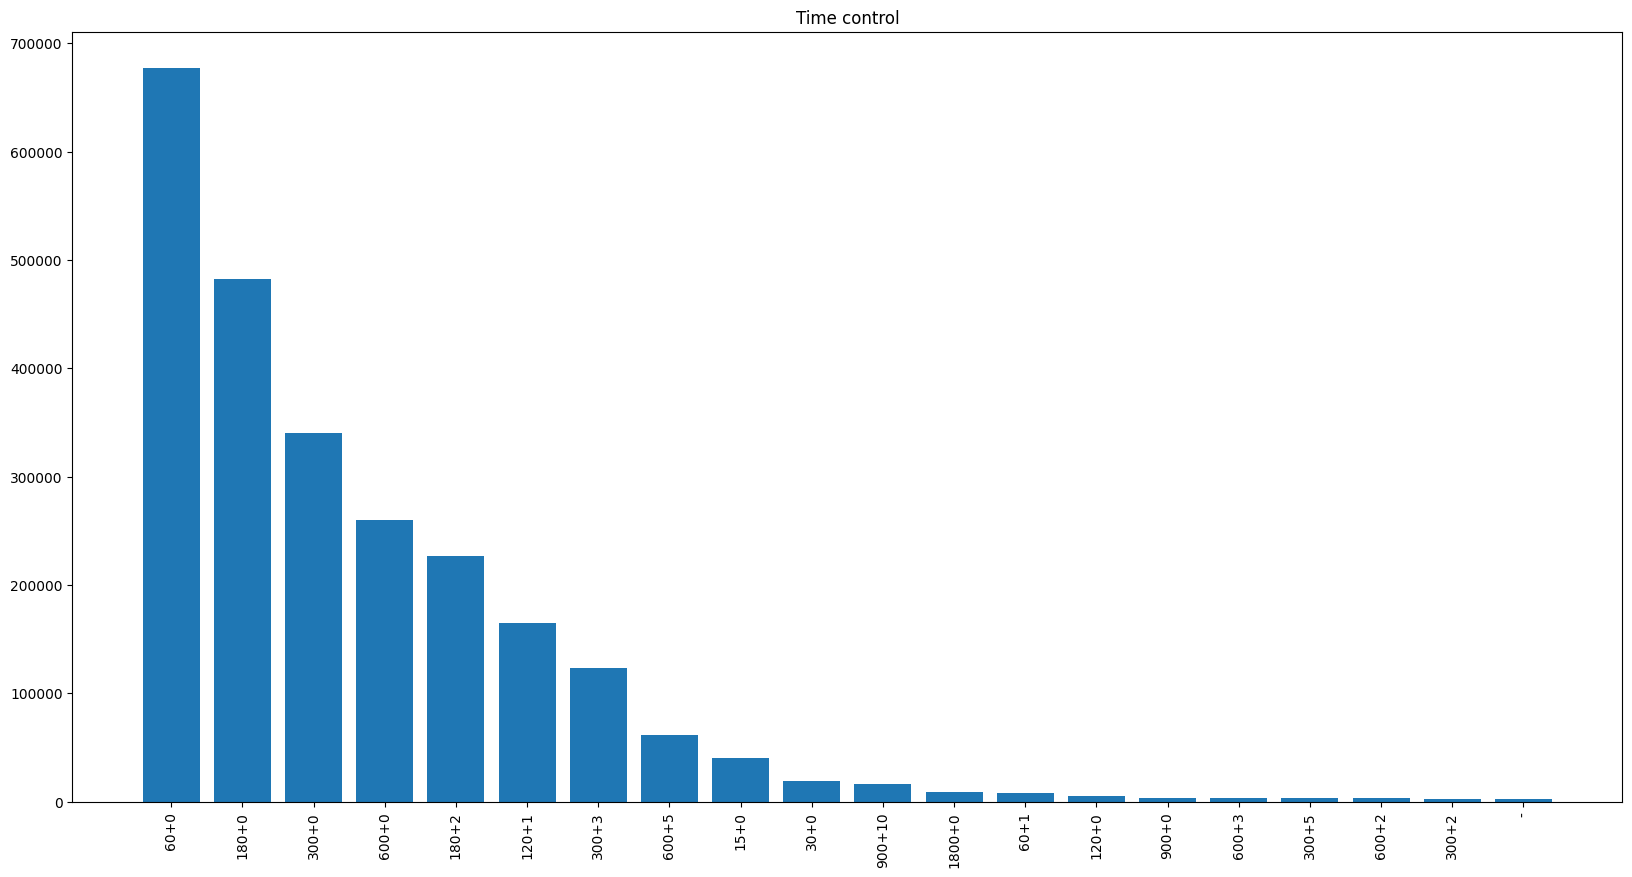

In [18]:
# Trim the data to remove empty bins in the beginning and end if needed
rating_bins_first_non_zero = next(i for i, x in enumerate(rating_bins) if x)
rating_bins_last_non_zero = len(rating_bins) - next(i for i, x in enumerate(reversed(rating_bins)) if x)

rating_bins = rating_bins[rating_bins_first_non_zero:rating_bins_last_non_zero]

length_bins_first_non_zero = next(i for i, x in enumerate(length_bins) if x)
length_bins_last_non_zero = len(length_bins) - next(i for i, x in enumerate(reversed(length_bins)) if x)

length_bins = length_bins[length_bins_first_non_zero:length_bins_last_non_zero]


# Plot the histograms
plt.figure(figsize=(20, 10))
plt.bar(range(rating_range[0], rating_range[0] + len(rating_bins) * RATING_BIN_SIZE, RATING_BIN_SIZE), rating_bins, width=RATING_BIN_SIZE, align="edge", edgecolor="black")
plt.title("Player ratings")
# Add a horizontal line at 20k games to see which ratings are most common
plt.axhline(y=10000, color='r', linestyle='--')
# Make the pillar width wider

plt.figure(figsize=(20, 10))
plt.bar(["Win", "Loss", "Draw"], result_bins)
plt.title("Game results")

plt.figure(figsize=(20, 10))
plt.bar(range(length_range[0], length_range[0] + len(length_bins) * LENGTH_BIN_SIZE, LENGTH_BIN_SIZE), length_bins, width=LENGTH_BIN_SIZE, align="edge", edgecolor="black")
plt.title("Game length")

plt.figure(figsize=(20, 10))
sorted_time_control_bins = sorted(time_control_bins.items(), key=lambda x: x[1], reverse=True)
pruned_time_control_bins = sorted_time_control_bins[:20]
plt.bar([x[0] for x in pruned_time_control_bins], [x[1] for x in pruned_time_control_bins])
plt.title("Time control")
# Rotate the x-axis labels
plt.xticks(rotation=90)


In [9]:
sorted_time_control_bins

[('60+0', 277579),
 ('180+0', 198333),
 ('300+0', 139582),
 ('600+0', 107844),
 ('180+2', 80266),
 ('120+1', 64921),
 ('300+3', 48226),
 ('600+5', 24096),
 ('15+0', 10467),
 ('30+0', 8138),
 ('900+10', 6638),
 ('1800+0', 3523),
 ('60+1', 3355),
 ('120+0', 1766),
 ('900+0', 1435),
 ('420+3', 1254),
 ('600+3', 1173),
 ('300+5', 1121),
 ('480+0', 942),
 ('-', 935),
 ('0+1', 933),
 ('300+2', 904),
 ('600+2', 879),
 ('420+0', 688),
 ('240+0', 651),
 ('180+1', 613),
 ('600+10', 562),
 ('1200+0', 556),
 ('900+5', 427),
 ('1800+20', 422),
 ('180+3', 399),
 ('900+3', 383),
 ('900+15', 339),
 ('300+8', 298),
 ('0+2', 287),
 ('60+2', 286),
 ('900+2', 283),
 ('120+2', 279),
 ('60+3', 275),
 ('1500+0', 272),
 ('300+1', 265),
 ('420+2', 261),
 ('420+5', 260),
 ('600+1', 254),
 ('300+4', 238),
 ('300+10', 231),
 ('360+0', 219),
 ('45+0', 211),
 ('15+4', 191),
 ('1500+10', 178),
 ('360+3', 167),
 ('15+1', 148),
 ('480+3', 141),
 ('300+7', 127),
 ('90+0', 126),
 ('360+2', 121),
 ('180+5', 116),
 ('120+

In [12]:
# time_controls = ['60+0', '180+0', '300+0', '600+0']
time_controls = ['60+0']
goal_ratings_amounts = {time_control: 25000 for time_control in time_controls}
goal_buffer = 0.02
ratings_range = (900, 2400)
ratings_bin_size = 50
num_bins = (ratings_range[1] - ratings_range[0]) // ratings_bin_size

time_control_dict = {time_control: {"ratings_histogram": [0] * ((ratings_range[1] - ratings_range[0]) // ratings_bin_size), "games": [], "finished": False} for time_control in time_controls}

i = 0

time_start = time.time()

with open(file_path, "r") as pgn_file:
    while not all([time_control_dict[time_control]["finished"] for time_control in time_controls]):
        game = chess.pgn.read_game(pgn_file)
        
        if game is None:
            break
        
        i += 1
        if i % 10000 == 0:
            print(f"Processed {i} games")
            
        if i % 100000 == 0:
            print(f"Time elapsed: {time.time() - time_start} seconds")
            # Print the histograms
            for time_control in time_controls:
                print(f"Time control: {time_control}")
                print(f"Ratings histogram: {time_control_dict[time_control]['ratings_histogram']}")
                print(f"Finished: {time_control_dict[time_control]['finished']}")
        
        time_control = game.headers["TimeControl"]
        
        if time_control not in time_controls or time_control_dict[time_control]["finished"]:
            continue
        
        white_rating = int(game.headers["WhiteElo"])
        black_rating = int(game.headers["BlackElo"])
        
        if white_rating < ratings_range[0] or white_rating > ratings_range[1] or black_rating < ratings_range[0] or black_rating > ratings_range[1]:
            continue
            
        white_bin = min((white_rating - ratings_range[0]) // ratings_bin_size, num_bins - 1)
        black_bin = min((black_rating - ratings_range[0]) // ratings_bin_size, num_bins - 1)
        
        if time_control_dict[time_control]["ratings_histogram"][white_bin] >= goal_ratings_amounts[time_control] * (1 + goal_buffer) or time_control_dict[time_control]["ratings_histogram"][black_bin] >= goal_ratings_amounts[time_control] * (1 + goal_buffer):
            continue
        
        if time_control_dict[time_control]["ratings_histogram"][white_bin] >= goal_ratings_amounts[time_control] and time_control_dict[time_control]["ratings_histogram"][black_bin] >= goal_ratings_amounts[time_control]:
            continue
        
        time_control_dict[time_control]["ratings_histogram"][white_bin] += 1
        time_control_dict[time_control]["ratings_histogram"][black_bin] += 1
        time_control_dict[time_control]["games"].append(game)
        
        if all([x >= goal_ratings_amounts[time_control] for x in time_control_dict[time_control]["ratings_histogram"]]):
            time_control_dict[time_control]["finished"] = True
            
print(f"Processing took {time.time() - time_start} seconds")

Processed 10000 games
Processed 20000 games
Processed 30000 games
Processed 40000 games
Processed 50000 games
Processed 60000 games
Processed 70000 games
Processed 80000 games
Processed 90000 games
Processed 100000 games
Time elapsed: 147.7593231201172 seconds
Time control: 60+0
Ratings histogram: [232, 284, 623, 828, 800, 889, 1201, 1424, 1312, 1582, 1509, 2067, 1971, 2369, 2259, 2509, 2439, 2961, 2726, 2707, 2916, 2872, 2315, 2528, 2441, 2046, 1886, 1711, 1037, 868]
Finished: False
Processed 110000 games
Processed 120000 games
Processed 130000 games
Processed 140000 games
Processed 150000 games
Processed 160000 games
Processed 170000 games
Processed 180000 games
Processed 190000 games
Processed 200000 games
Time elapsed: 236.7572159767151 seconds
Time control: 60+0
Ratings histogram: [504, 649, 1162, 1519, 1675, 1836, 2351, 2808, 2592, 3205, 3233, 3831, 4226, 4841, 4672, 4978, 4866, 5621, 5473, 5586, 5721, 5544, 4878, 5247, 4566, 3948, 3678, 3297, 2184, 1601]
Finished: False
Processe

In [13]:
import sys
# Get the size of the time control dictionary in MB
sys.getsizeof(time_control_dict) / 1024 / 1024

0.00017547607421875

In [14]:
# Save the games to a pgn file
output_file_path = ""

for time_control in time_controls:
    with open(f"{output_file_path}2024-09_games_{time_control}_{len(time_control_dict[time_control]['games'])}.pgn", "w") as output_file:
        for game in time_control_dict[time_control]["games"]:
            output_file.write(str(game) + "\n\n")

In [8]:
# Calculate the histogram for a file
path = "games/2024-09_games_60+0_382004.pgn"

rating_range = (900, 2400)
RATING_BIN_SIZE = 50
rating_bins = [0] * ((rating_range[1] - rating_range[0]) // RATING_BIN_SIZE + 1)

with open(path, "r") as pgn_file:
    i = 0
    game = chess.pgn.read_game(pgn_file)
    while game is not None:
        if i % 10000 == 0:
            print(f"Processed {i} games")
        white_player = game.headers["White"]
        black_player = game.headers["Black"]
        result = game.headers["Result"]
        game_length = game.end().board().fullmove_number
        time_control = game.headers["TimeControl"]
        
        white_rating = int(game.headers["WhiteElo"])
        black_rating = int(game.headers["BlackElo"])
        
        rating_bins[(white_rating - rating_range[0]) // RATING_BIN_SIZE] += 1
        rating_bins[(black_rating - rating_range[0]) // RATING_BIN_SIZE] += 1
        
        game = chess.pgn.read_game(pgn_file)
        i += 1

Processed 0 games
Processed 10000 games
Processed 20000 games
Processed 30000 games
Processed 40000 games
Processed 50000 games
Processed 60000 games
Processed 70000 games
Processed 80000 games
Processed 90000 games
Processed 100000 games
Processed 110000 games
Processed 120000 games
Processed 130000 games
Processed 140000 games
Processed 150000 games
Processed 160000 games
Processed 170000 games
Processed 180000 games
Processed 190000 games
Processed 200000 games
Processed 210000 games
Processed 220000 games
Processed 230000 games
Processed 240000 games
Processed 250000 games
Processed 260000 games
Processed 270000 games
Processed 280000 games
Processed 290000 games
Processed 300000 games
Processed 310000 games
Processed 320000 games
Processed 330000 games
Processed 340000 games
Processed 350000 games
Processed 360000 games
Processed 370000 games
Processed 380000 games


In [26]:
rating_bins

[25000,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25500,
 25008]